<a href="https://colab.research.google.com/github/VikasSharma707/LGMVIP-Data-Science/blob/main/StockMarket_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LGM-VIP Data Science Internship Programme 2021**

# **BEGINNER LEVEL TASK**
# **Name: Stock Market Prediction And Forecasting Using Stacked LSTM**

In [1]:
import pandas as pd


Reading the csv file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**For the prediction select the 'Close' Column into a new data frame**

In [3]:
df = df.sort_values(by=['Date'])
df1 = df.reset_index()['Close']
df1.shape

(2035,)

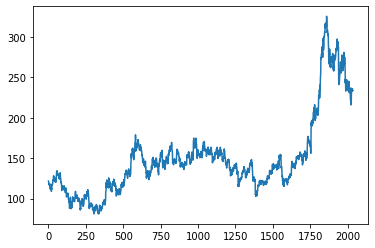

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1);


In [5]:
#LSTM are sensetive to scale of the data. so we apply min-max scaler

**LSTM is sensetive to Normalization, so the scale..used MinMaxScaler**

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [7]:
#train test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[:training_size, :], df1[training_size:len(df1), :1]
training_size, test_size

(1322, 713)

In [8]:
import numpy

#convert an array of values into a datasets matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [9]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [11]:
print(X_test.shape), print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [12]:
#reshape data
X_train = X_train.reshape(X_train.shape[0], X_test.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Create the Stacked LSTM model

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 264ms/step - loss: 0.0116 - val_loss: 0.0252
Epoch 2/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 3/100
20/20 [==============================] - 4s 197ms/step - loss: 8.9158e-04 - val_loss: 0.0038
Epoch 4/100
20/20 [==============================] - 4s 197ms/step - loss: 7.8141e-04 - val_loss: 0.0055
Epoch 5/100
20/20 [==============================] - 4s 198ms/step - loss: 8.0070e-04 - val_loss: 0.0034
Epoch 6/100
20/20 [==============================] - 4s 197ms/step - loss: 7.4283e-04 - val_loss: 0.0051
Epoch 7/100
20/20 [==============================] - 4s 199ms/step - loss: 7.3416e-04 - val_loss: 0.0037
Epoch 8/100
20/20 [==============================] - 4s 203ms/step - loss: 7.3569e-04 - val_loss: 0.0023
Epoch 9/100
20/20 [==============================] - 4s 204ms/step - loss: 7.0158e-04 - val_loss: 0.0034
Epoch 10/100
20/20 [==============================] - 4s 202ms

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


Prediction

In [17]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [18]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

133.3315370082756

In [20]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

193.45364270798777

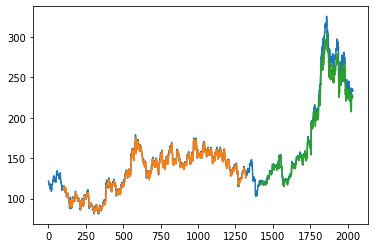

In [21]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
len(test_data)

713

In [23]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [24]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [25]:
temp_input

[0.28431372549019607,
 0.289828431372549,
 0.29289215686274506,
 0.29452614379084974,
 0.28451797385620914,
 0.28594771241830064,
 0.29595588235294124,
 0.2892156862745098,
 0.284109477124183,
 0.2798202614379084,
 0.27450980392156865,
 0.28288398692810457,
 0.29084967320261434,
 0.28737745098039225,
 0.29003267973856206,
 0.2890114379084967,
 0.2973856209150326,
 0.2906454248366013,
 0.2947303921568627,
 0.31352124183006536,
 0.3073937908496731,
 0.3039215686274509,
 0.29146241830065367,
 0.292687908496732,
 0.29861111111111116,
 0.3018790849673202,
 0.298406862745098,
 0.29289215686274506,
 0.30085784313725483,
 0.3002450980392156,
 0.29370915032679734,
 0.2718545751633987,
 0.2800245098039216,
 0.27308006535947715,
 0.2606209150326797,
 0.24816176470588225,
 0.2536764705882353,
 0.26940359477124187,
 0.26327614379084974,
 0.26388888888888895,
 0.27961601307189543,
 0.2918709150326797,
 0.3018790849673202,
 0.30228758169934633,
 0.29432189542483655,
 0.3047385620915033,
 0.3008578431